# STRUCTURAL ANALYSIS

In [65]:
import pandas as pd
import structural_analysis
import statistics
import structure_validation
import importlib
from scipy import stats

In [2]:
df_allsp = pd.read_csv("/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/.varalign/prointvar_analysis_data/anks_final_aln.sto_prointvar_structure_table_with_validation.csv")

2020-06-08 14:38:01,039 - WARNING - /cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,14,15,18,19,25,26,28,29,31,32,33,41,42,43,44,45,46,47,48,51,52,63,65,67,69,71,75,77,90,91,95,113,114,115,118,119,122,123,128,129,132,133,142,143,149,151,153,154,155,156,157,161,163,169,206,208,226,227,228,229,230,239,269,272,276,278,279,283,299,300,303,307,309,310) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 


In [3]:
df_allsp_rsrz_filt = structure_validation.filter_rsrz_rscc(df_allsp) #200155
print(len(df_allsp_rsrz_filt))

191617


In [35]:
df_allsp_rsrz_filt.SS_A = df_allsp_rsrz_filt.SS_A.fillna("")

2020-06-08 14:55:36,594 - WARNING - /cluster/gjb_lab/2394007/miniconda/envs/myenv/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
 


In [36]:
structural_analysis.get_struc_info(df_allsp_rsrz_filt)

The dataframe contains information of:
38439 residues, 10571 of which are unique
160 PDB structures
70 different proteins
359 unique repeats


In [37]:
cons_cols_allsp = structural_analysis.get_cons_cols('/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto', 'stockholm')

# CONSENSUS RESIDUE SURFACE ACCESSIBILITY CLASS

In [39]:
rsa_class_dict, rsa_dict = structural_analysis.get_rsa_class_consensus(df_allsp_rsrz_filt, cons_cols_allsp)

The dataframe contains information of:
35484 residues, 9966 of which are unique
146 PDB structures
65 different proteins
342 unique repeats
Processing consensus column 1
Processing consensus column 2
Processing consensus column 3
Processing consensus column 4
Processing consensus column 5
Processing consensus column 6
Processing consensus column 7
Processing consensus column 8
Processing consensus column 9
Processing consensus column 10
Processing consensus column 11
Processing consensus column 12
Processing consensus column 13
Processing consensus column 14
Processing consensus column 15
Processing consensus column 16
Processing consensus column 17
Processing consensus column 18
Processing consensus column 19
Processing consensus column 20
Processing consensus column 21
Processing consensus column 22
Processing consensus column 23
Processing consensus column 24
Processing consensus column 25
Processing consensus column 26
Processing consensus column 27
Processing consensus column 28
P

In [40]:
rsa_class_df = structural_analysis.get_rsa_class_df(rsa_class_dict)

In [51]:
rsa_class_df.head()

,core,surf,part,tot,p_core,p_surf,p_part,p_tot
1,12,255,32,299,0.040134,0.852843,0.107023,1.0
2,72,137,105,314,0.229299,0.436306,0.334395,1.0
3,68,67,184,319,0.213166,0.210031,0.576803,1.0
4,201,36,93,330,0.609091,0.109091,0.281818,1.0
5,279,36,18,333,0.837838,0.108108,0.054054,1.0


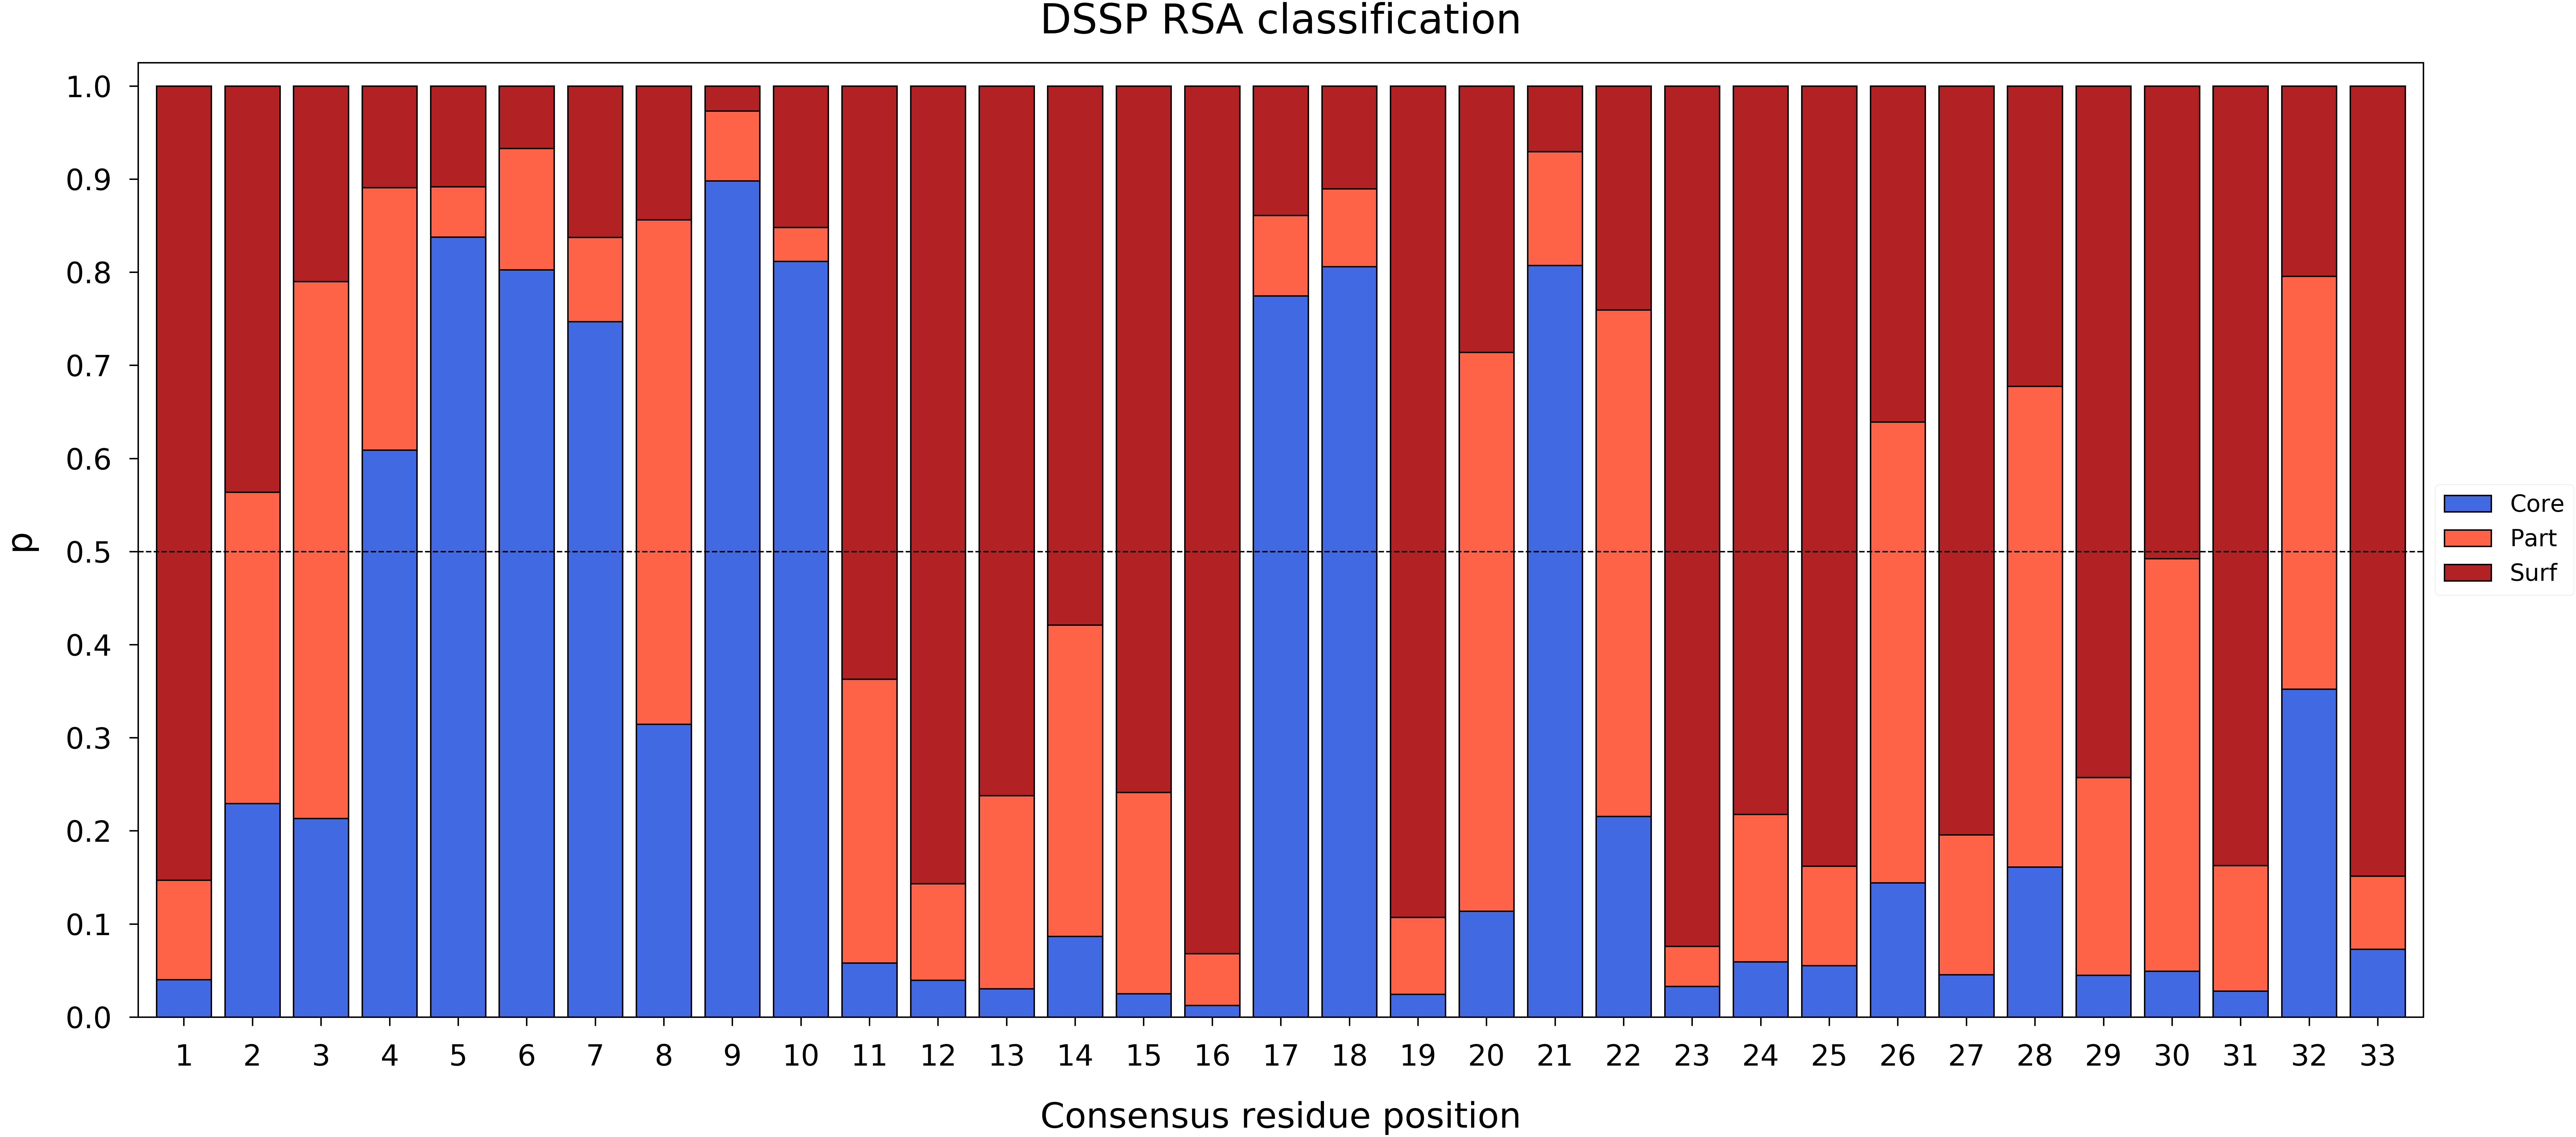

In [41]:
structural_analysis.plot_rsa_consensus(rsa_class_df, palette = ["royalblue", "tomato", "firebrick"], bwidth = 1.2)

# MEDIAN RESIDUE SURFACE ACCESSIBILITY PER RESIDUE

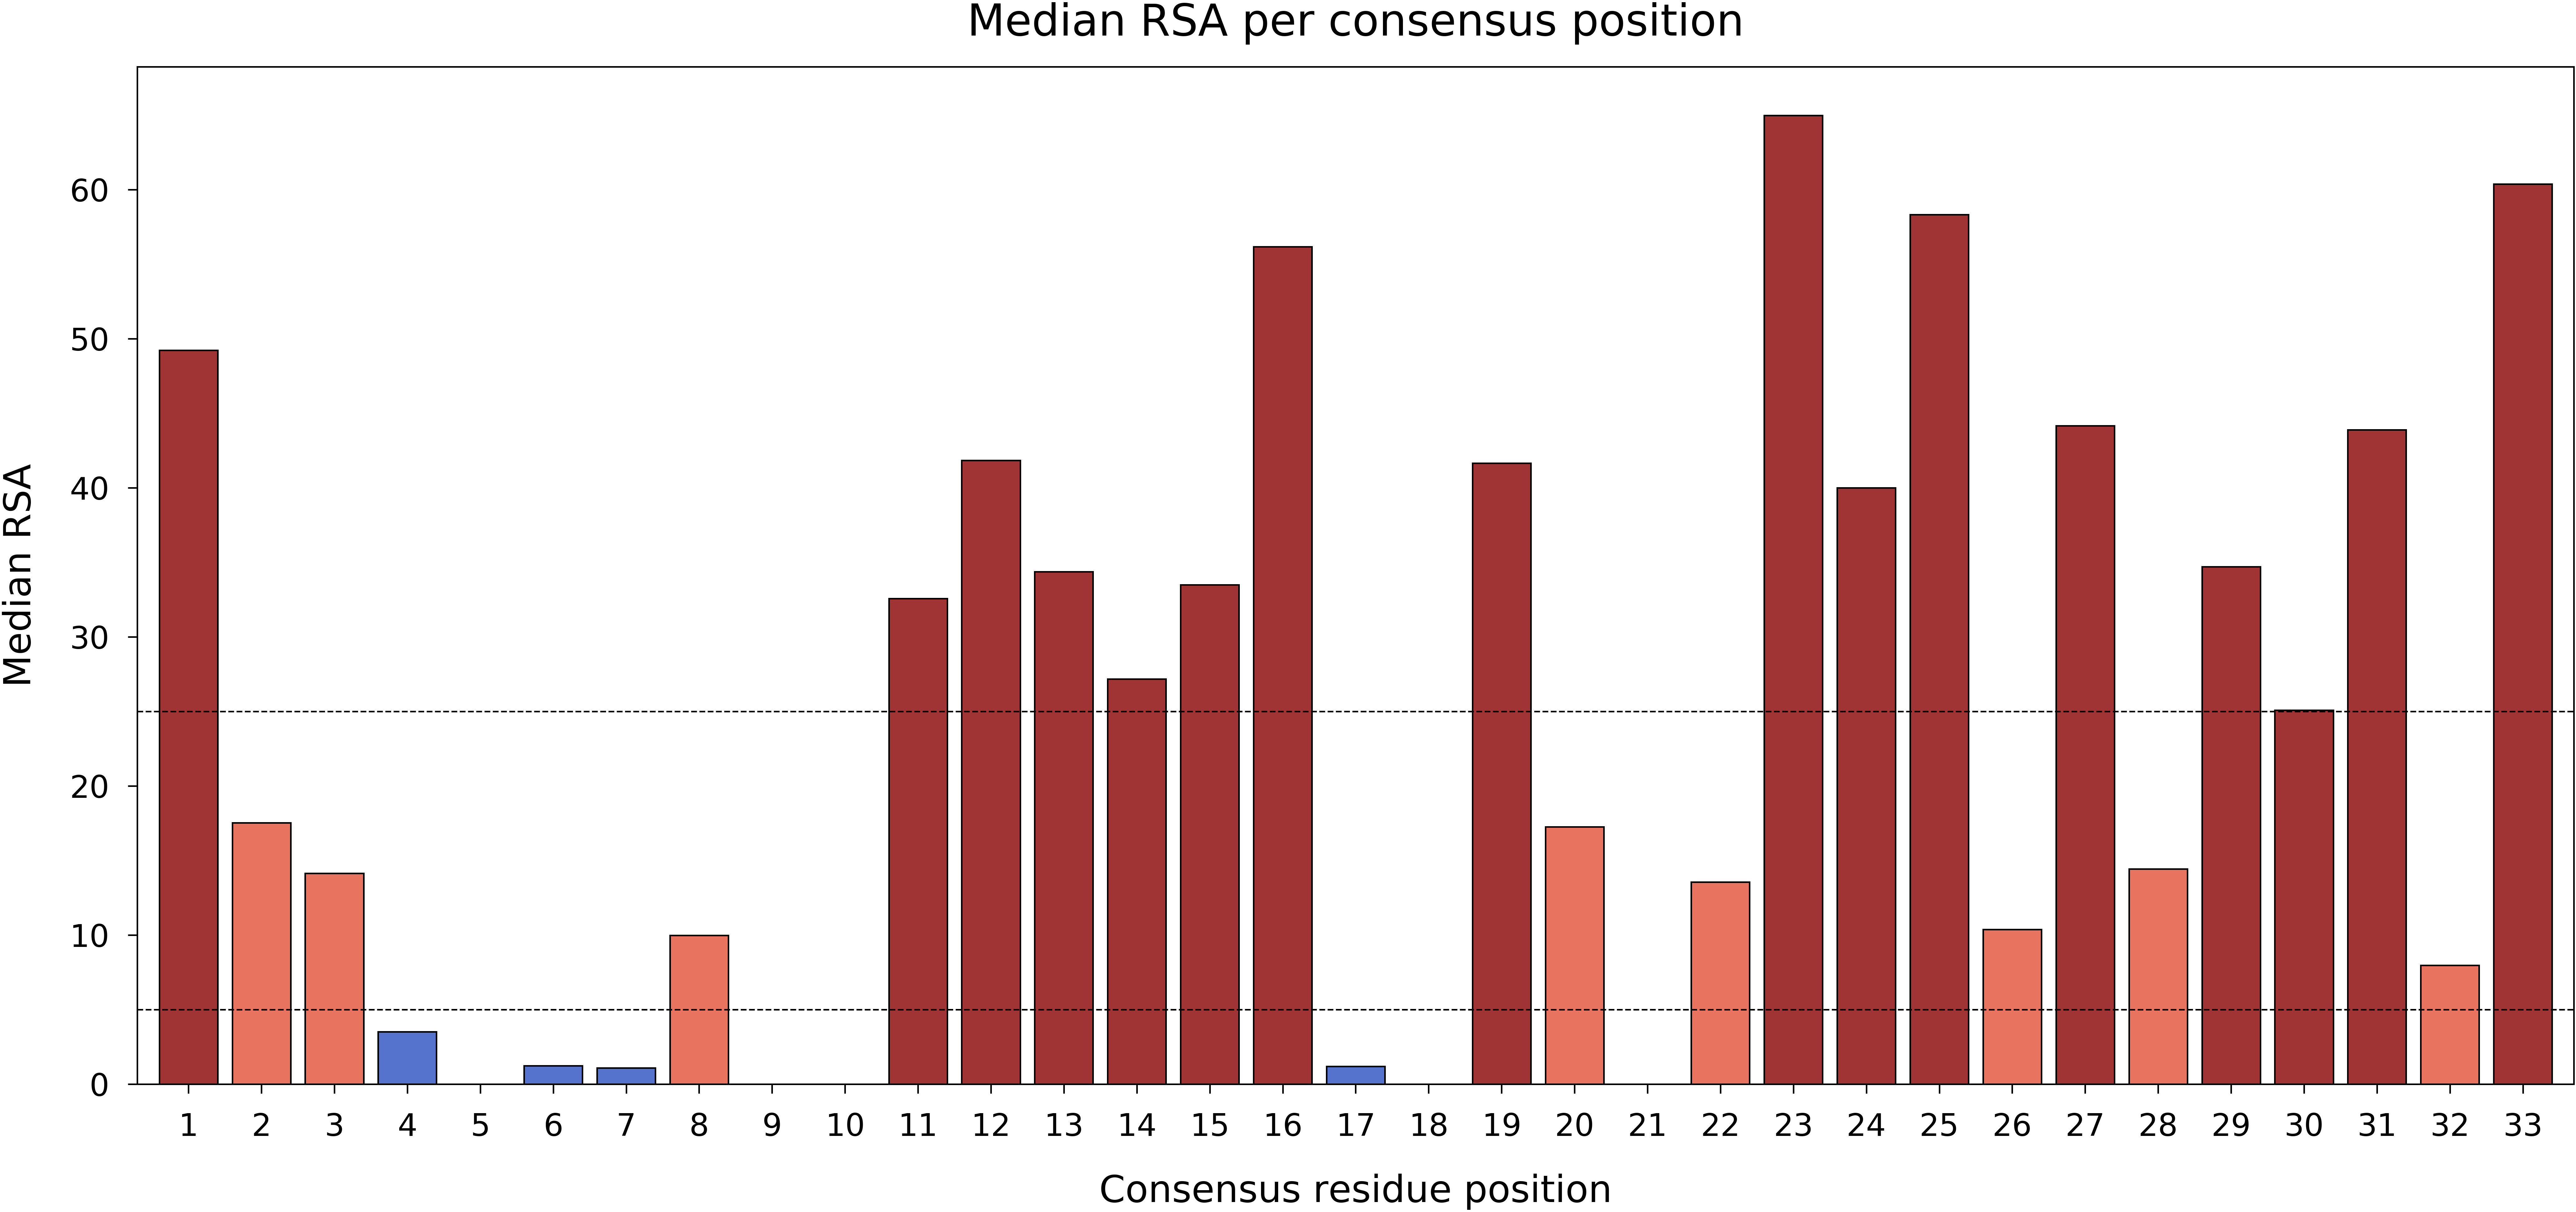

In [57]:
rsa_median = structural_analysis.plot_rsa_median(rsa_dict)

## CORRELATION BETWEEN CX AND RSA

In [60]:
cx_median = [1.8856816211307061,
 1.659675782089367,
 1.2870893262707075,
 1.0883252513133714,
 1.0149246543604902,
 1.0379375320893351,
 1.089158394560468,
 1.0534608737293019,
 1.0382927897828071,
 1.0889696260685466,
 1.218570251386872,
 1.3190723832633824,
 1.4716571323268208,
 1.4156428437031967,
 1.6821796706264776,
 1.8099136488943026,
 1.29898208963568,
 1.3549529817148793,
 1.7187088850570915,
 1.5678360353074097,
 1.374513071257187,
 1.5717213298478352,
 2.0317464956315727,
 1.8178883320224013,
 1.9006360523526808,
 1.6113922354530799,
 1.5314698161970424,
 1.3970783639092634,
 1.4742638588630124,
 1.3831225438927208,
 1.617158653183737,
 1.3919159473940959,
 1.9768713359979664]

In [64]:
cx_rsa_df = pd.DataFrame(list(zip(cx_median, rsa_median)),  columns =['cx', 'rsa'])
cx_rsa_df.index = range(1, len(cx_rsa_df)+1)

In [68]:
stats.pearsonr(cx_median, rsa_median)

(0.8164021229717738, 6.953790759326981e-09)

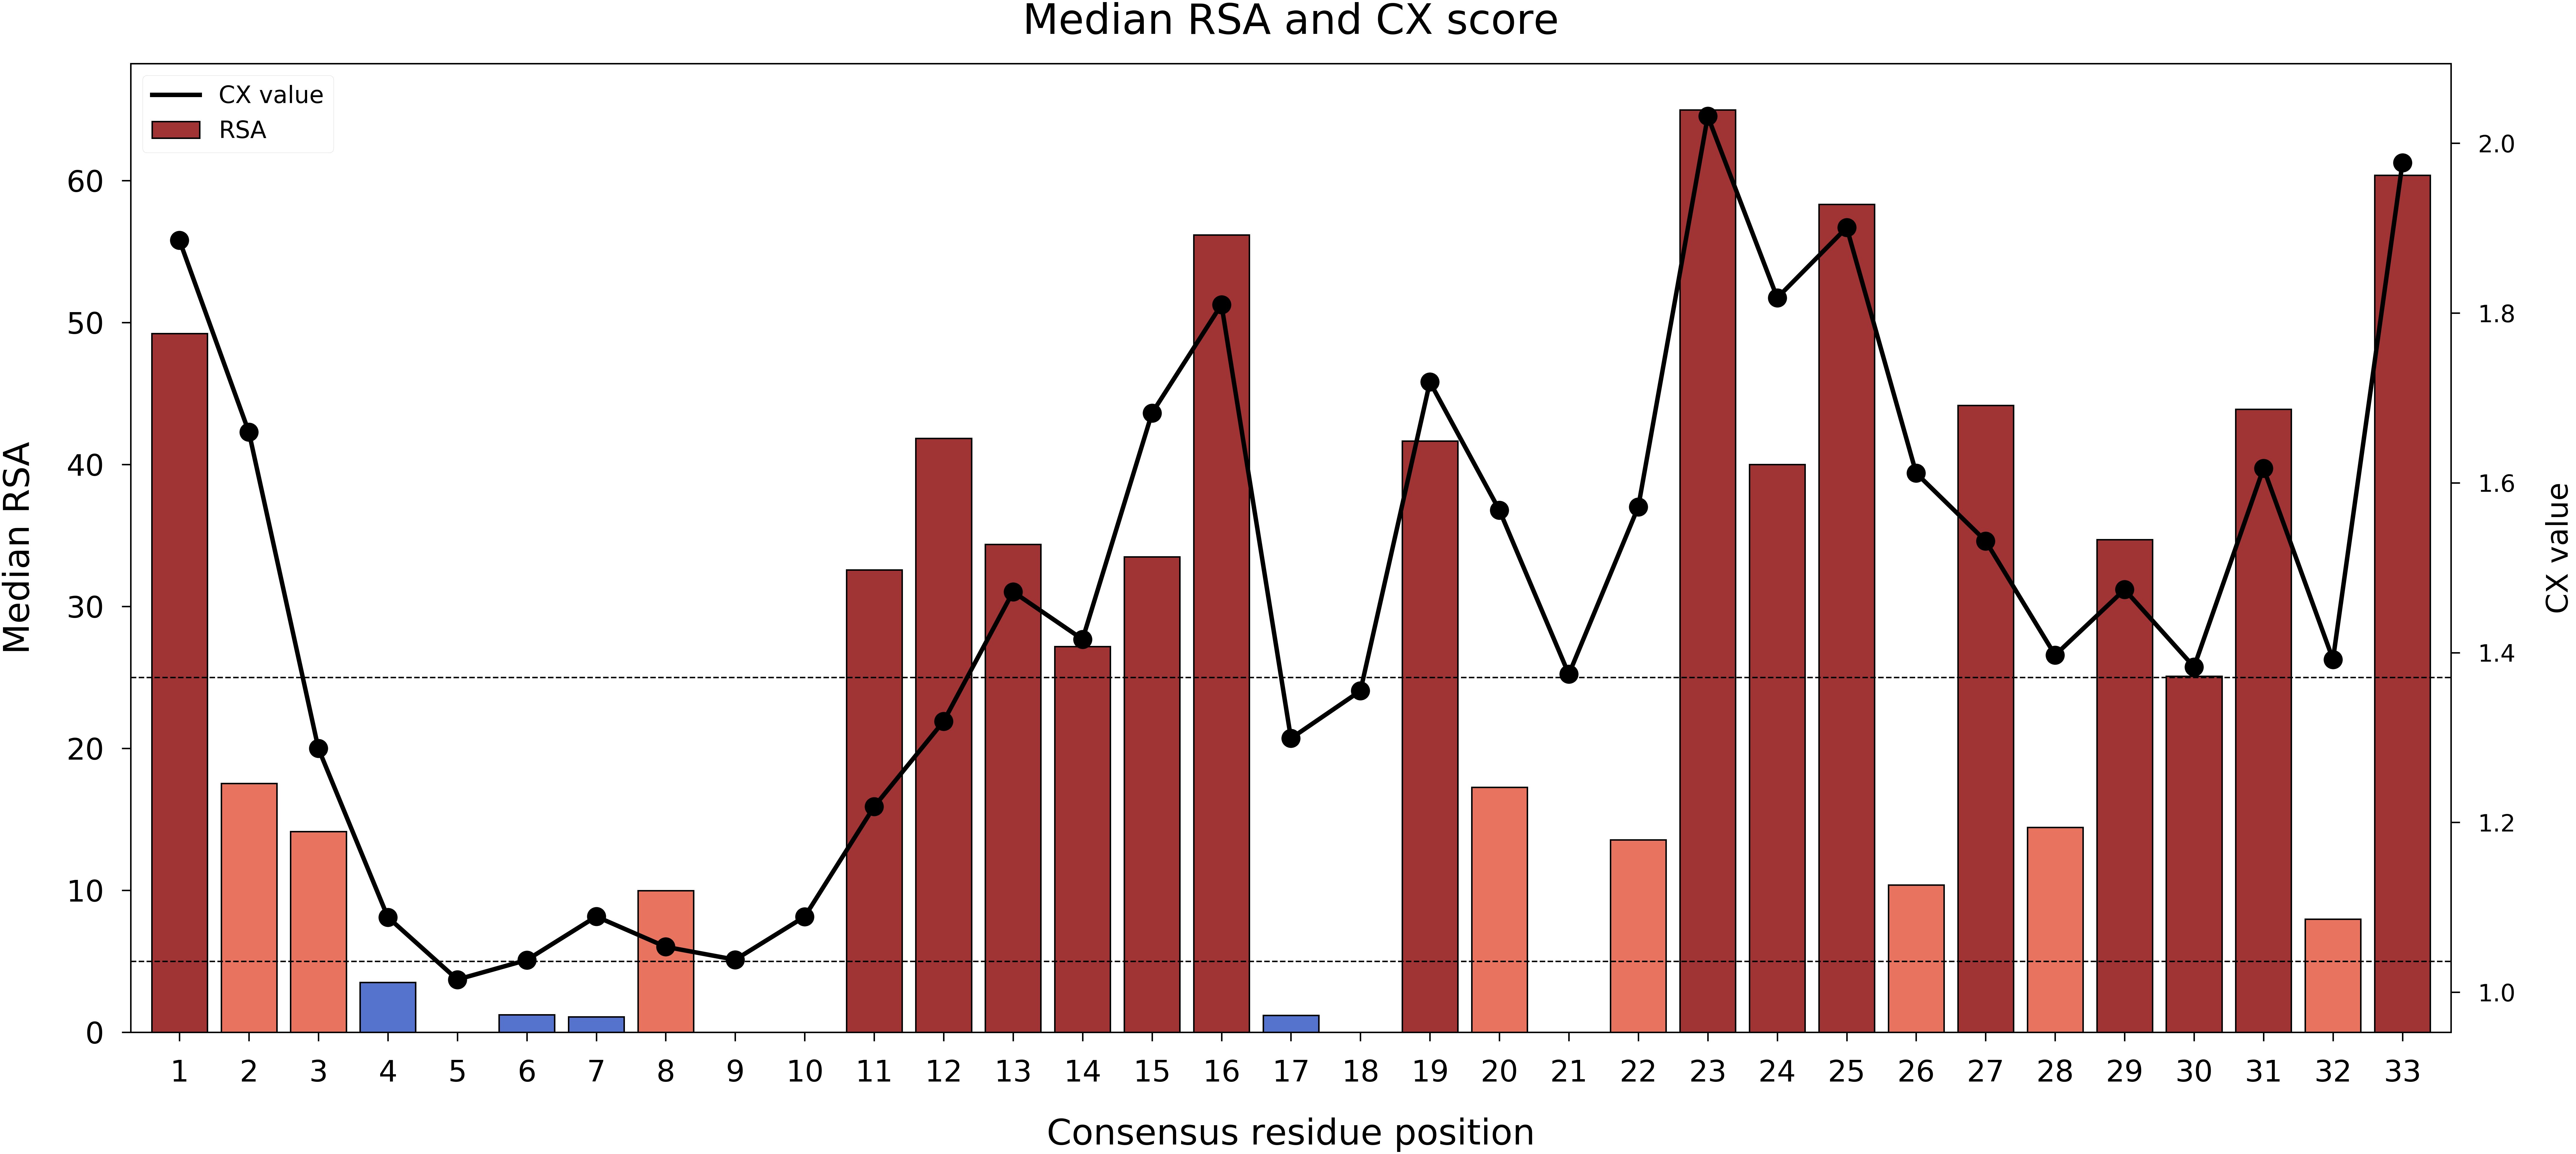

In [73]:
structural_analysis.plot_rsa_cx(cx_rsa_df)

## CONSENSUS SECONDARY STRUCTURE CLASS ASSIGNMENT

In [42]:
ss_class_dict = structural_analysis.get_ss_class_consensus(df_allsp_rsrz_filt, cons_cols_allsp)

The dataframe contains information of:
37792 residues, 10398 of which are unique
160 PDB structures
70 different proteins
359 unique repeats
Processing consensus column 1
Processing consensus column 2
Processing consensus column 3
Processing consensus column 4
Processing consensus column 5
Processing consensus column 6
Processing consensus column 7
Processing consensus column 8
Processing consensus column 9
Processing consensus column 10
Processing consensus column 11
Processing consensus column 12
Processing consensus column 13
Processing consensus column 14
Processing consensus column 15
Processing consensus column 16
Processing consensus column 17
Processing consensus column 18
Processing consensus column 19
Processing consensus column 20
Processing consensus column 21
Processing consensus column 22
Processing consensus column 23
Processing consensus column 24
Processing consensus column 25
Processing consensus column 26
Processing consensus column 27
Processing consensus column 28


In [43]:
ss_class_df = structural_analysis.get_ss_class_df(ss_class_dict)

In [50]:
ss_class_df.head()

,helix,coil,strand,tot,p_helix,p_coil,p_strand,p_tot
1,10,299,3,312,0.032051,0.958333,0.009615,1.0
2,18,308,1,327,0.055046,0.941896,0.003058,1.0
3,21,313,1,335,0.062687,0.934328,0.002985,1.0
4,17,327,0,344,0.049419,0.950581,0.000000,1.0
5,334,12,1,347,0.962536,0.034582,0.002882,1.0


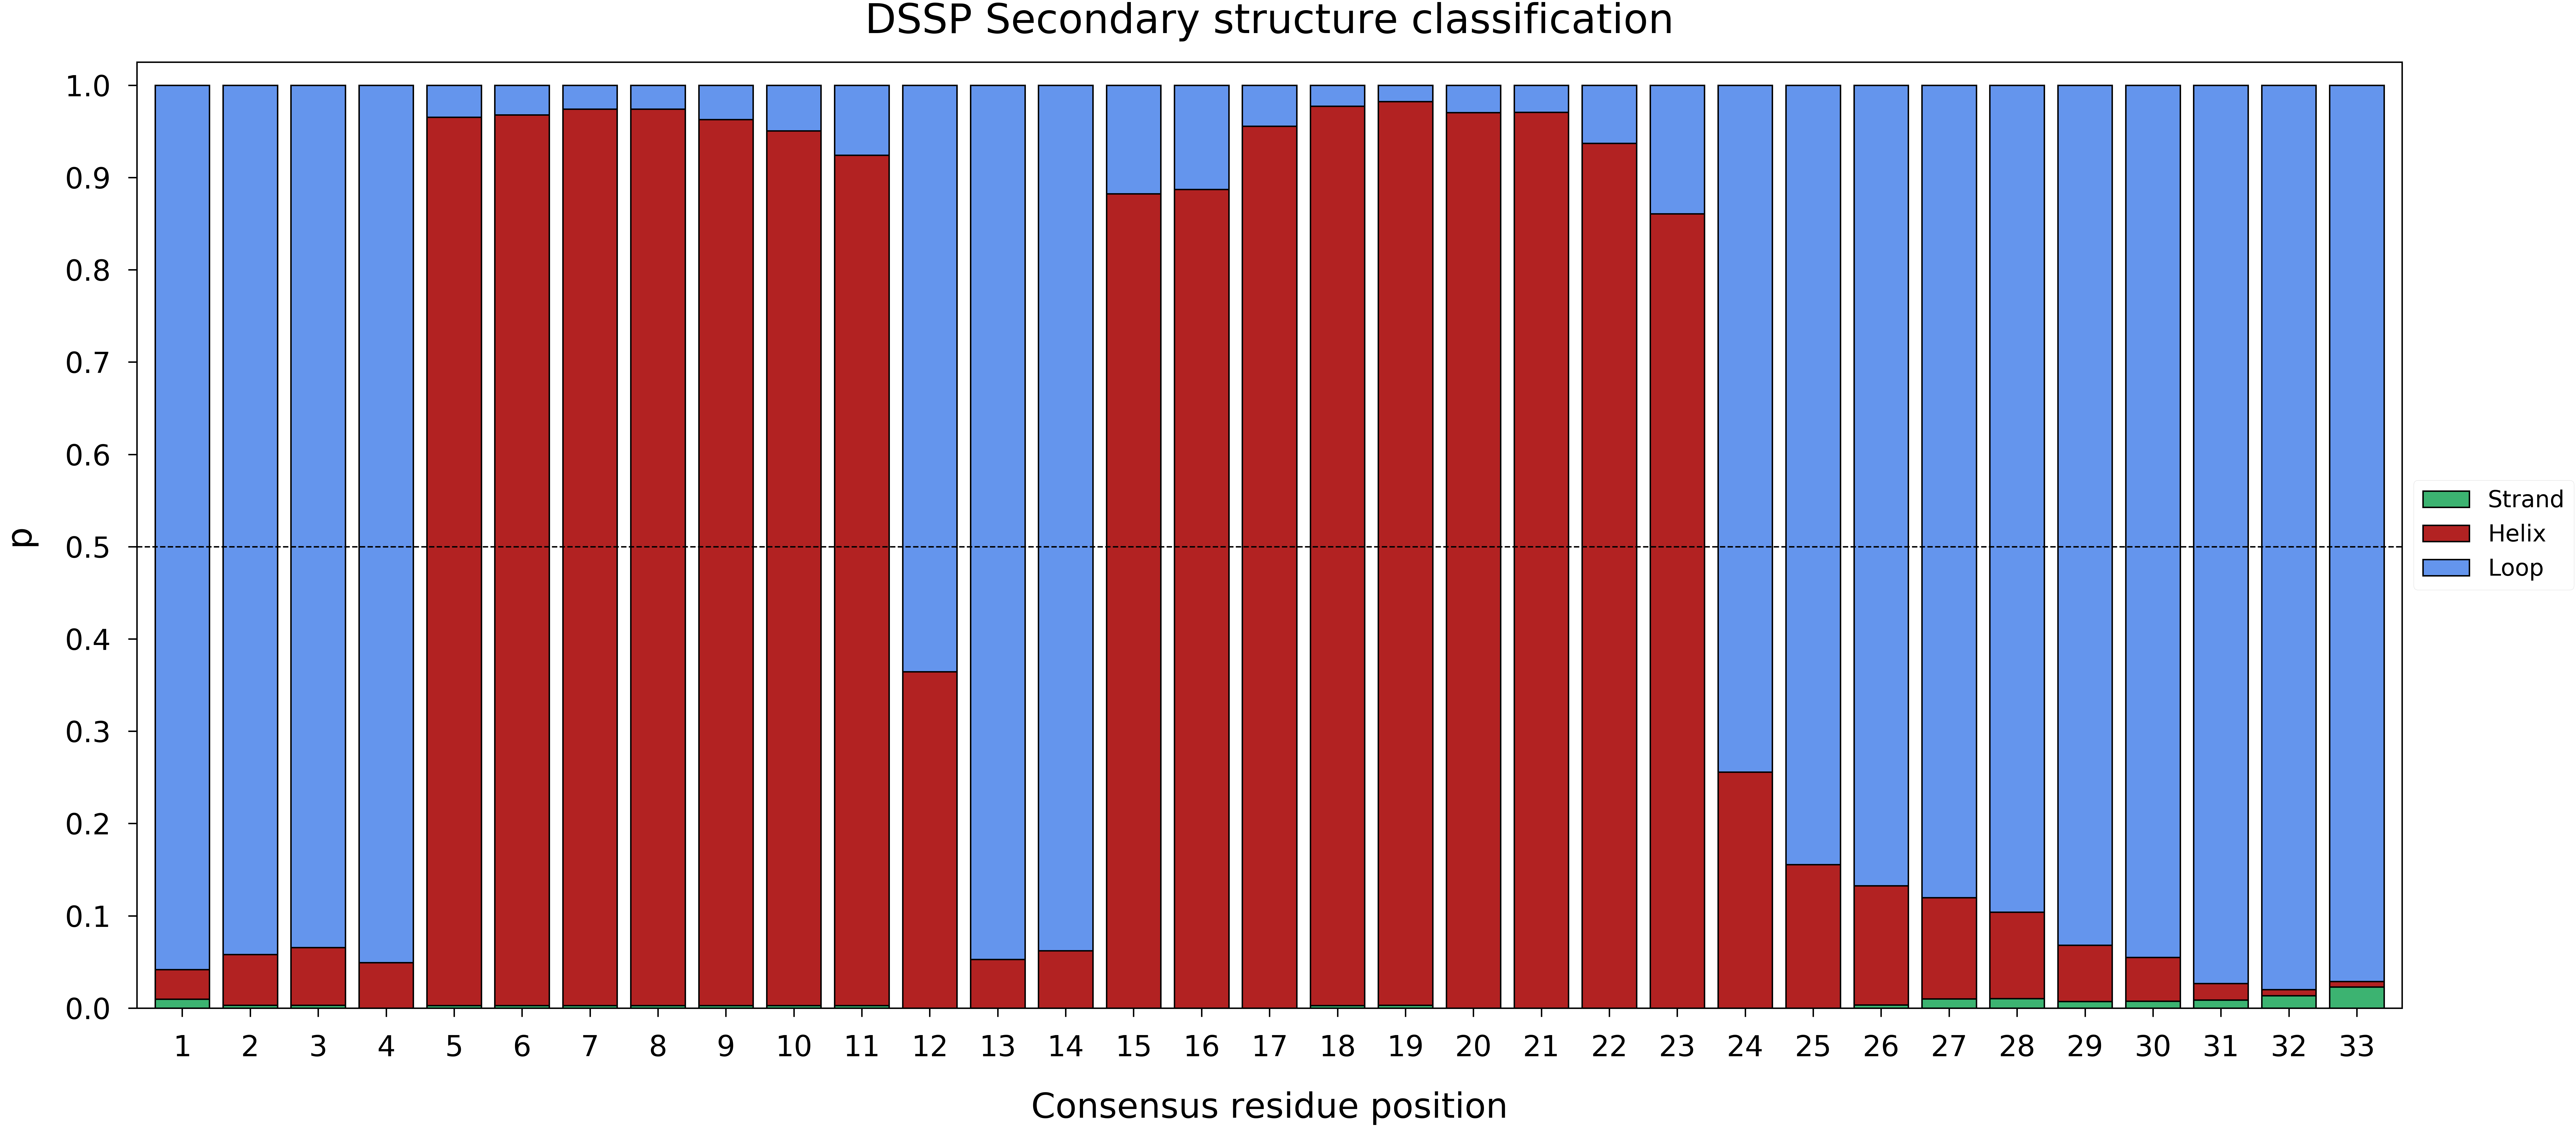

In [44]:
structural_analysis.plot_ss_class_consensus(ss_class_df, palette = ["mediumseagreen", "firebrick", "cornflowerblue"])

# CONSENSUS SECONDARY STRUCTURE ASSIGNMENT

In [45]:
ss_dict = structural_analysis.get_ss_consensus(df_allsp_rsrz_filt, cons_cols_allsp)

The dataframe contains information of:
37793 residues, 10398 of which are unique
160 PDB structures
70 different proteins
359 unique repeats
Processing consensus column 1
Processing consensus column 2
Processing consensus column 3
Processing consensus column 4
Processing consensus column 5
Processing consensus column 6
Processing consensus column 7
Processing consensus column 8
Processing consensus column 9
Processing consensus column 10
Processing consensus column 11
Processing consensus column 12
Processing consensus column 13
Processing consensus column 14
Processing consensus column 15
Processing consensus column 16
Processing consensus column 17
Processing consensus column 18
Processing consensus column 19
Processing consensus column 20
Processing consensus column 21
Processing consensus column 22
Processing consensus column 23
Processing consensus column 24
Processing consensus column 25
Processing consensus column 26
Processing consensus column 27
Processing consensus column 28


In [46]:
ss_df = structural_analysis.get_ss_df(ss_dict)

In [49]:
ss_df.head()

,a_helix,b_bridge,strand,helix_3_10,pi_helix,turn,bend,coil,tot,p_a_helix,p_b_bridge,p_strand,p_3_10_helix,p_pi_helix,p_turn,p_bend,p_coil,p_tot
1,10,4,3,2,0,256,18,19,312,0.032051,0.012821,0.009615,0.006410,0.0,0.820513,0.057692,0.060897,1.0
2,18,0,1,3,0,24,150,131,327,0.055046,0.000000,0.003058,0.009174,0.0,0.073394,0.458716,0.400612,1.0
3,21,10,1,1,0,3,10,289,335,0.062687,0.029851,0.002985,0.002985,0.0,0.008955,0.029851,0.862687,1.0
4,17,17,1,0,0,1,14,294,344,0.049419,0.049419,0.002907,0.000000,0.0,0.002907,0.040698,0.854651,1.0
5,334,0,1,1,0,4,3,4,347,0.962536,0.000000,0.002882,0.002882,0.0,0.011527,0.008646,0.011527,1.0


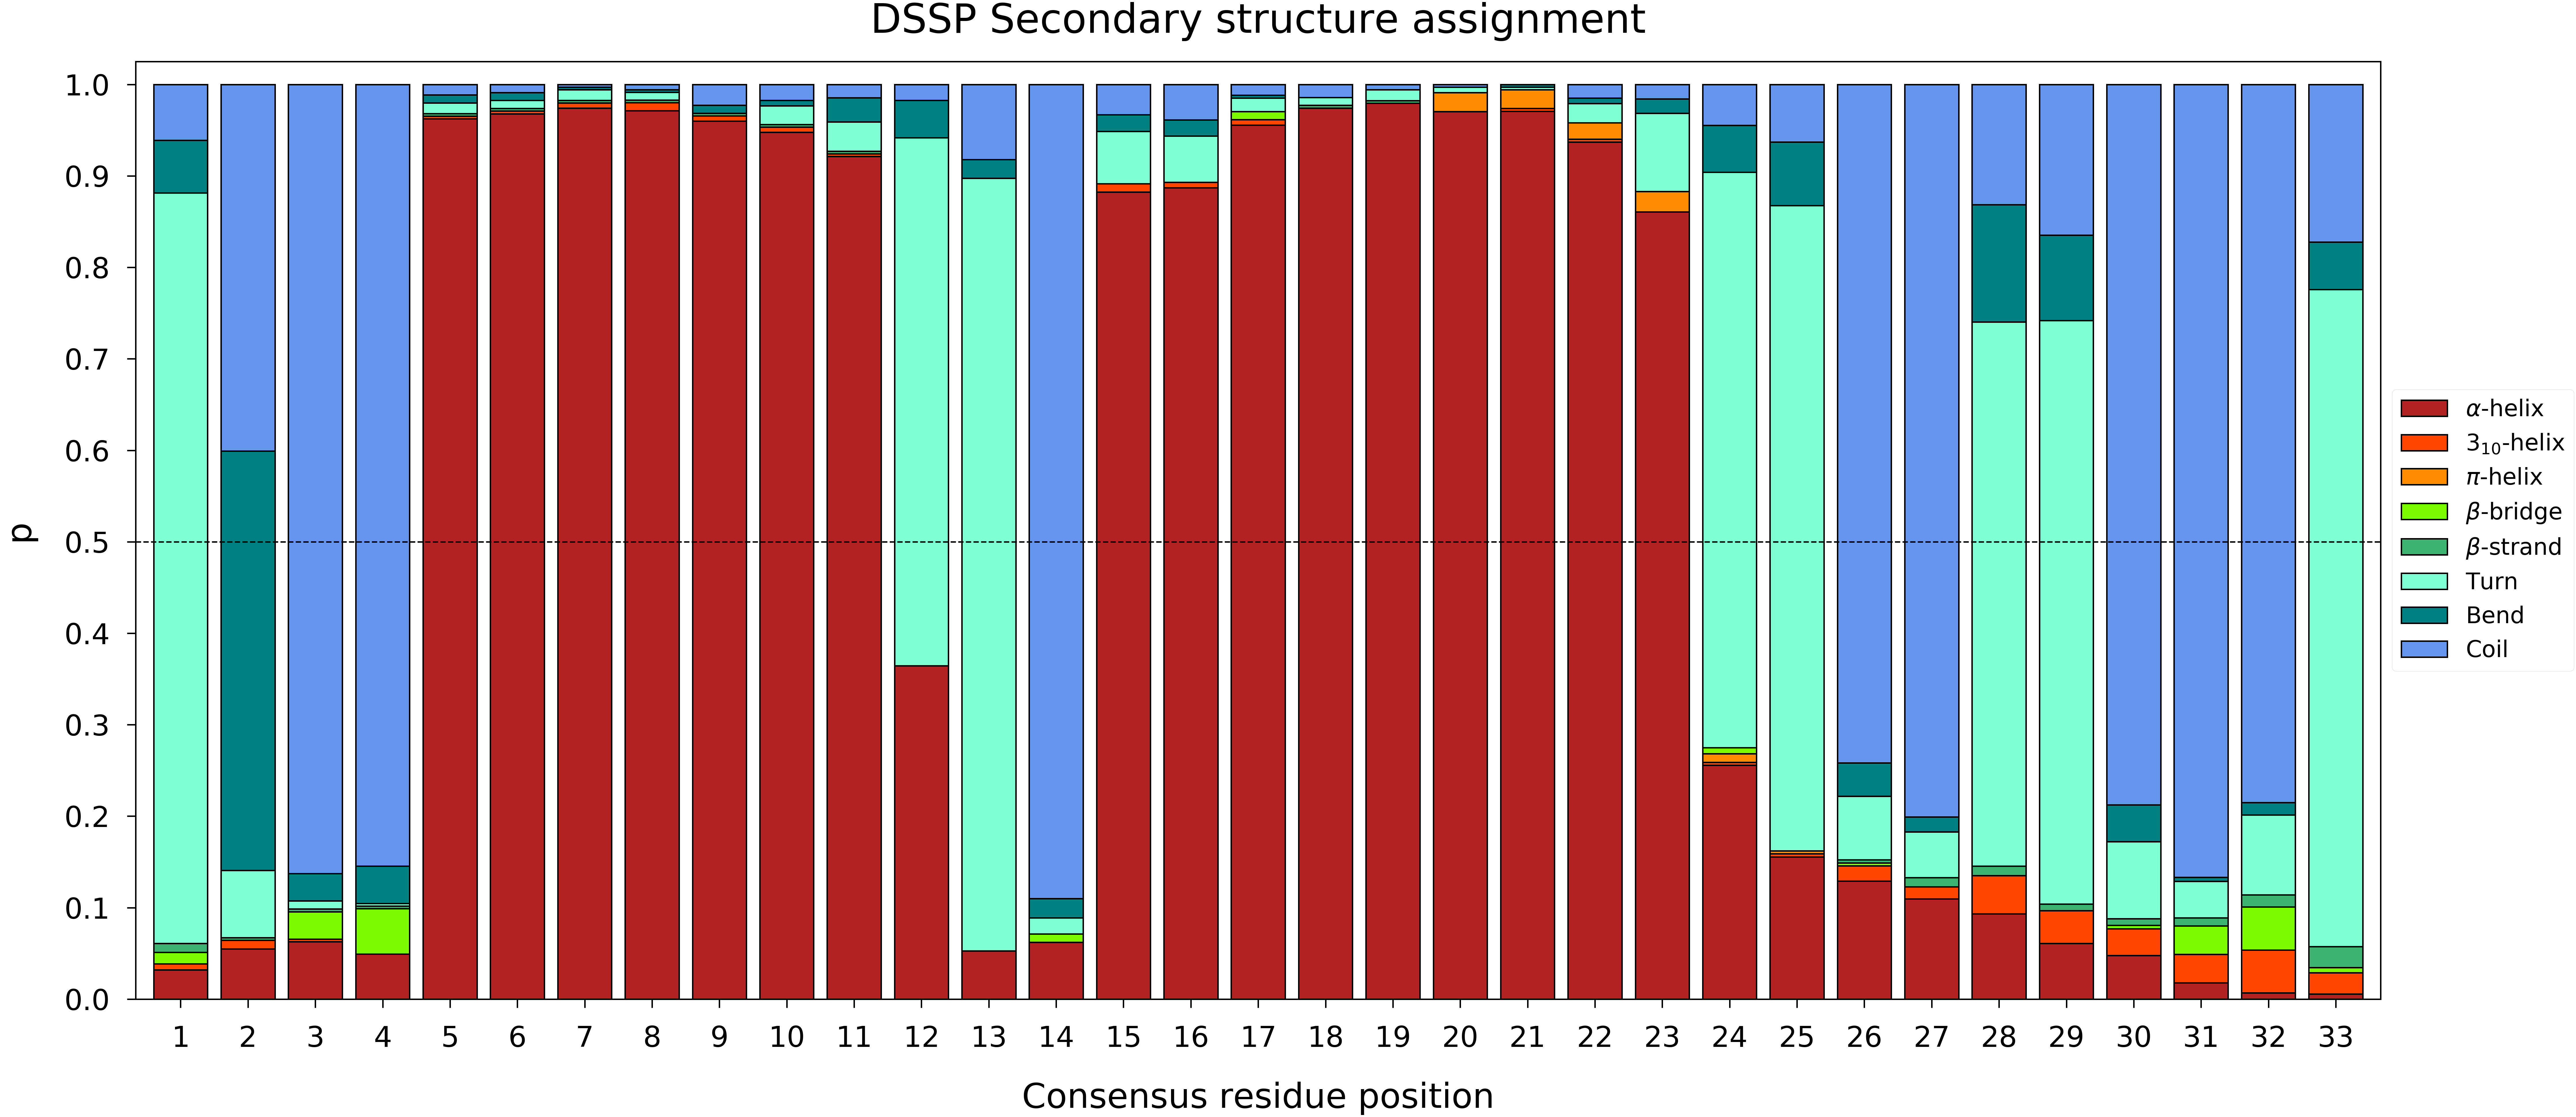

In [48]:
structural_analysis.plot_ss_consensus(ss_df)

## ENRICHMENT IN PROTEIN-PROTEIN INTERACTIONS

In [13]:
aln_len_allsp = structural_analysis.get_aln_len('/cluster/gjb_lab/2394007/varalign_runs/varalign_edited_code2/anks_final_aln.sto', 'stockholm')
cons_norm_allsp = structural_analysis.get_ppis(df_allsp_rsrz_filt, aln_len_allsp, cons_cols_allsp)
res_occ_allsp = structural_analysis.get_struc_res_occ(df_allsp_rsrz_filt, cons_cols_allsp, "Protein-Protein")
contacts_allsp = pd.concat([res_occ_allsp, cons_norm_allsp], axis = 1)
contacts_allsp = structural_analysis.get_OR(contacts_allsp)

The dataframe contains information of:
1862 residues, 863 of which are unique
64 PDB structures
37 different proteins
137 unique repeats


In [14]:
contacts_allsp_ss_class = structural_analysis.add_surf_class(contacts_allsp)

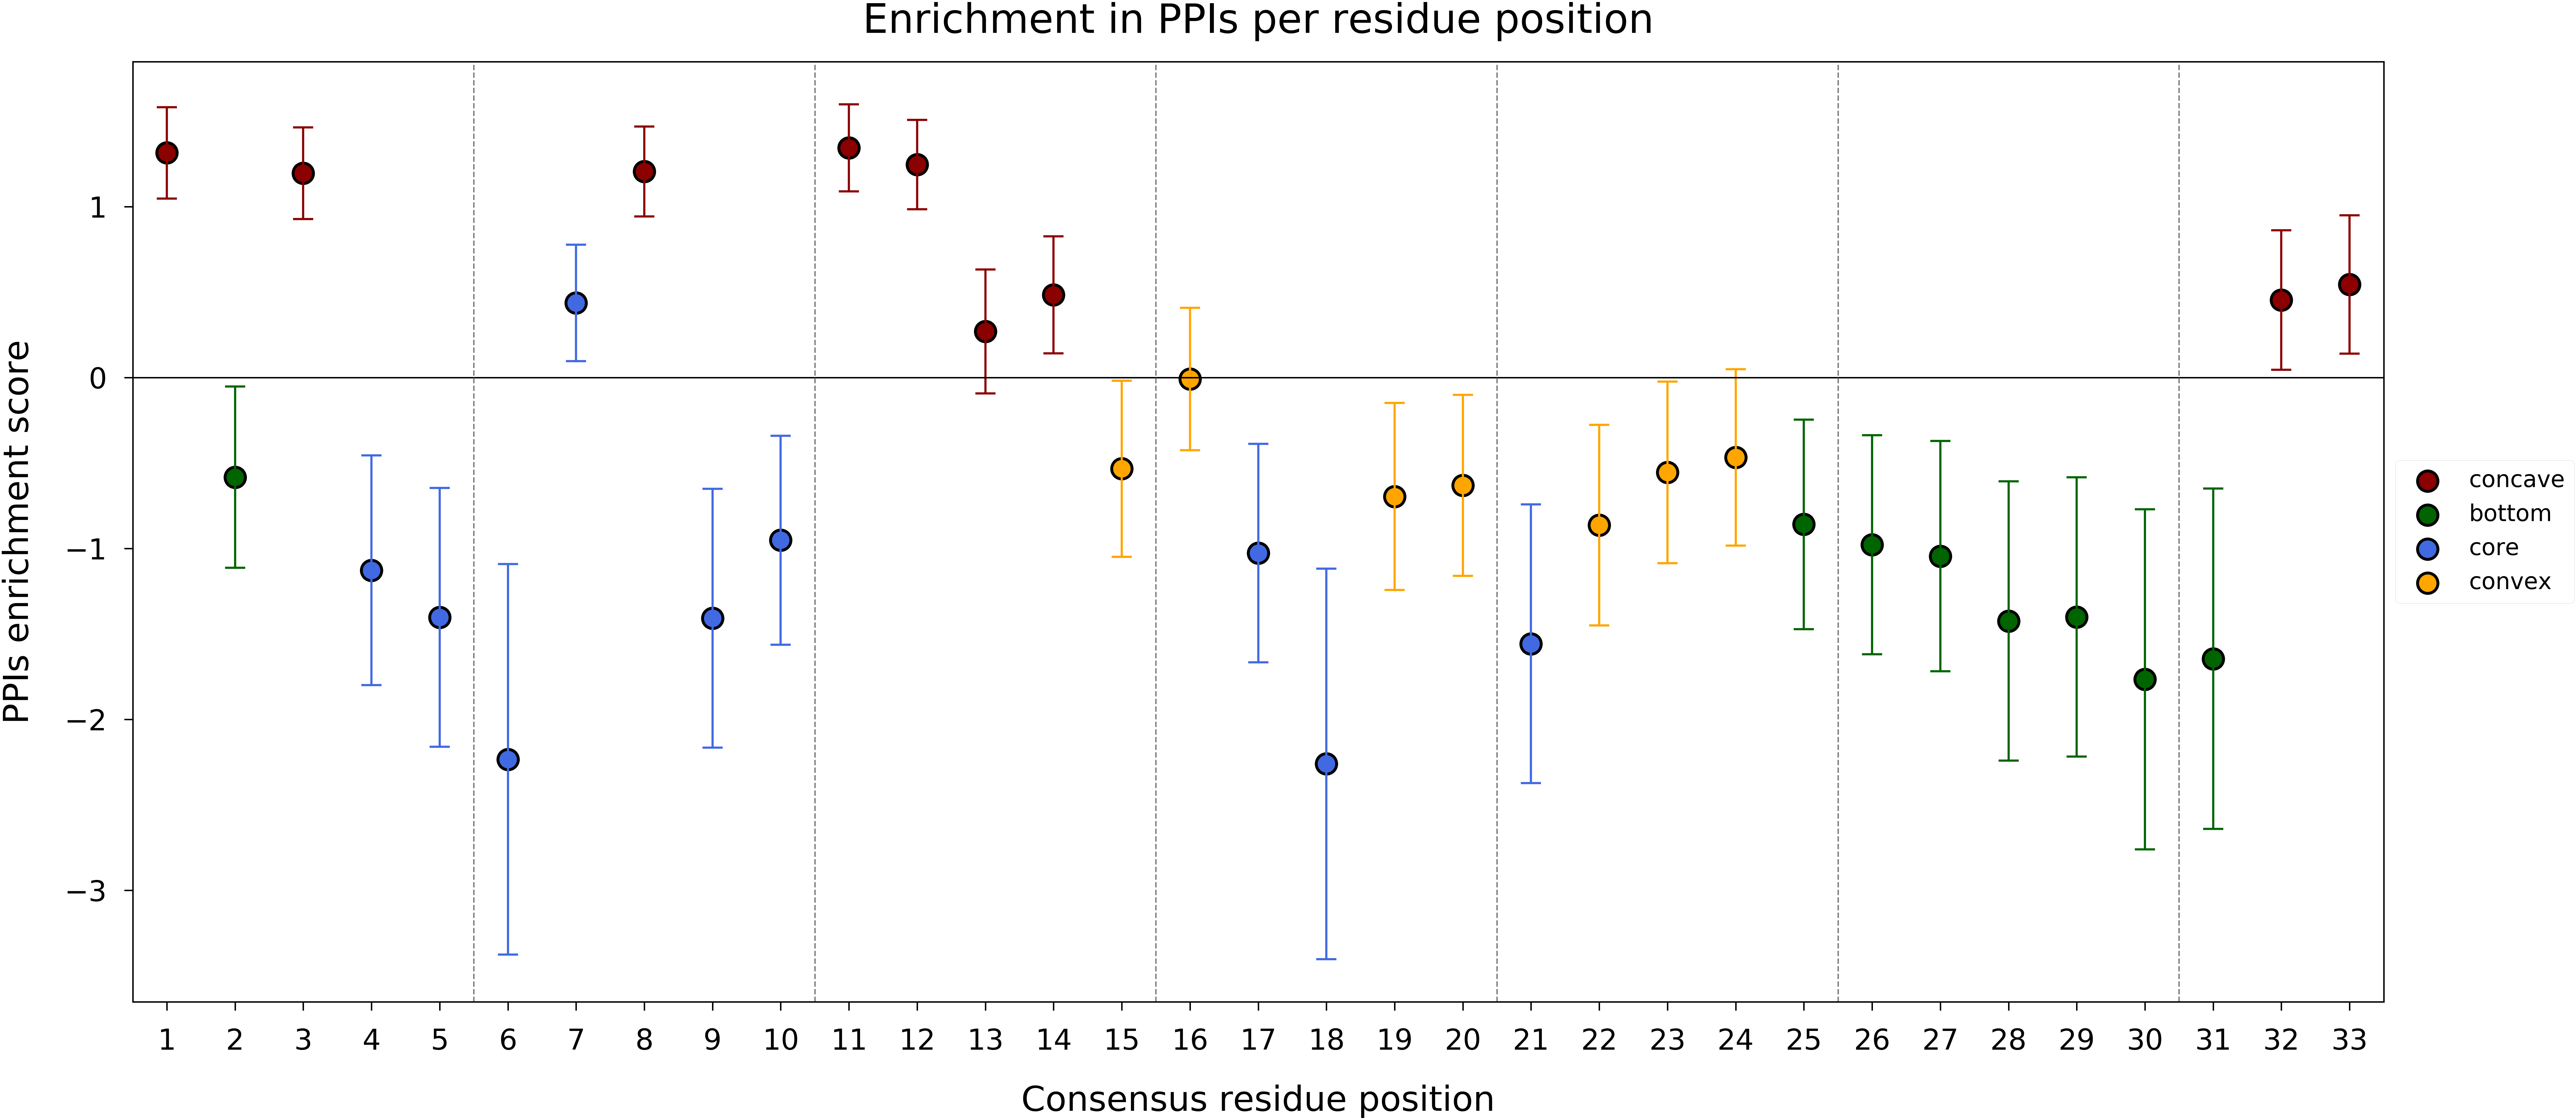

In [15]:
structural_analysis.plot_ppi_enrichment(contacts_allsp_ss_class, "Surface", "surf", "color_surf")